# Test - Cutoff 1 (4x4 and 5x5)

In [1]:
from sklearn.pipeline import Pipeline
from pymks.fmks.bases.primitive import PrimitiveTransformer
from pymks.fmks.correlations import TwoPointcorrelation,auto_correlation,correlations_multiple,center_slice,two_point_stats
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import dask.array as da

In [3]:
    >>> x_data1 = np.asarray([[[1, 1, 0 ,1],
    ...                       [0, 0, 1 ,0],
    ...                       [1, 1, 0 ,1],
    ...                       [1, 1, 0 ,1]]])
    >>> x_data2 = np.asarray([[[1, 1, 0 ,1 ,1],
    ...                       [0, 0, 1 ,0 ,0],
    ...                       [1, 1, 0 ,1 ,1],
    ...                       [1, 1, 0 ,1 ,0],
                              [1, 1, 1 ,1 ,0]]])
    >>> x_data3 = np.asarray([[[1, 1, 0 ,1 ,1],
    ...                       [0, 0, 1 ,0 ,0],
    ...                       [1, 1, 0 ,1 ,1],
    ...                       [1, 1, 0 ,1 ,0]]])
    >>> x_data4 = np.asarray([[[1, 1, 0 ,1 ],
    ...                       [0, 0, 1 ,0 ],
    ...                       [1, 1, 0 ,1 ],
    ...                       [1, 1, 0 ,1 ],
                              [1, 1, 1 ,1 ]]])
    >>> x_data5 = np.repeat(x_data4[:,:,:,np.newaxis],4,axis=3)
    

In [4]:
    >>> x_data6 = np.asarray([[[1, 1, 0 ,1],
    ...                       [0, 0, 1 ,0 ],
    ...                       [1, 1, 0 ,1 ],
    ...                       [1, 1, 0 ,1 ],
                              [1, 1, 1 ,1 ]]])
    print(x_data6.shape)

(1, 5, 4)


In [5]:
print(x_data1.shape)
print(x_data2.shape)
print(x_data3.shape)
print(x_data4.shape)
print(x_data5.shape)


(1, 4, 4)
(1, 5, 5)
(1, 4, 5)
(1, 5, 4)
(1, 5, 4, 4)


In [6]:
np.random.seed(122 )
x_data=np.asanyarray([np.random.randint(2,size=(5,5,5))])

In [7]:
chunks = x_data.shape
print(chunks)

(1, 5, 5, 5)


In [8]:
x_data = da.from_array(x_data, chunks=(chunks))

In [9]:
# x_data.chunks

In [10]:
x_data.shape

(1, 5, 5, 5)

In [11]:
f_data = auto_correlation(x_data)
print(f_data.compute())

[[[[0.208 0.216 0.224 0.184 0.192]
   [0.208 0.216 0.208 0.176 0.128]
   [0.224 0.176 0.176 0.208 0.184]
   [0.2   0.208 0.224 0.176 0.16 ]
   [0.2   0.192 0.184 0.192 0.208]]

  [[0.168 0.176 0.16  0.208 0.232]
   [0.216 0.216 0.248 0.16  0.224]
   [0.2   0.168 0.176 0.232 0.208]
   [0.232 0.232 0.152 0.208 0.208]
   [0.192 0.176 0.176 0.232 0.208]]

  [[0.208 0.216 0.2   0.216 0.184]
   [0.2   0.2   0.2   0.184 0.232]
   [0.192 0.208 0.448 0.208 0.192]
   [0.232 0.184 0.2   0.2   0.2  ]
   [0.184 0.216 0.2   0.216 0.208]]

  [[0.208 0.232 0.176 0.176 0.192]
   [0.208 0.208 0.152 0.232 0.232]
   [0.208 0.232 0.176 0.168 0.2  ]
   [0.224 0.16  0.248 0.216 0.216]
   [0.232 0.208 0.16  0.176 0.168]]

  [[0.208 0.192 0.184 0.192 0.2  ]
   [0.16  0.176 0.224 0.208 0.2  ]
   [0.184 0.208 0.176 0.176 0.224]
   [0.128 0.176 0.208 0.216 0.208]
   [0.192 0.184 0.224 0.216 0.208]]]]


In [12]:
center_slice(f_data,2)[0].compute()


array([[[0.208, 0.216, 0.224, 0.184, 0.192],
        [0.208, 0.216, 0.208, 0.176, 0.128],
        [0.224, 0.176, 0.176, 0.208, 0.184],
        [0.2  , 0.208, 0.224, 0.176, 0.16 ],
        [0.2  , 0.192, 0.184, 0.192, 0.208]],

       [[0.168, 0.176, 0.16 , 0.208, 0.232],
        [0.216, 0.216, 0.248, 0.16 , 0.224],
        [0.2  , 0.168, 0.176, 0.232, 0.208],
        [0.232, 0.232, 0.152, 0.208, 0.208],
        [0.192, 0.176, 0.176, 0.232, 0.208]],

       [[0.208, 0.216, 0.2  , 0.216, 0.184],
        [0.2  , 0.2  , 0.2  , 0.184, 0.232],
        [0.192, 0.208, 0.448, 0.208, 0.192],
        [0.232, 0.184, 0.2  , 0.2  , 0.2  ],
        [0.184, 0.216, 0.2  , 0.216, 0.208]],

       [[0.208, 0.232, 0.176, 0.176, 0.192],
        [0.208, 0.208, 0.152, 0.232, 0.232],
        [0.208, 0.232, 0.176, 0.168, 0.2  ],
        [0.224, 0.16 , 0.248, 0.216, 0.216],
        [0.232, 0.208, 0.16 , 0.176, 0.168]],

       [[0.208, 0.192, 0.184, 0.192, 0.2  ],
        [0.16 , 0.176, 0.224, 0.208, 0.2  ],
  

TypeError: Invalid shape (5, 5, 5) for image data

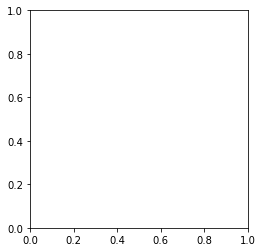

In [13]:
import matplotlib.pyplot as plt
plt.imshow(f_data[0])
plt.colorbar()

In [ ]:
a=(1,10,10) 
print(a[1:])

In [ ]:
list(x_data.shape)


In [ ]:
np.floor(1.5)

# Cases 

- odd square small cutoff
- odd square large cutoff
- different cutoff in different dimension
- even square small cutoff
- even square large cutoff
- Same for 3D

In [ ]:
print(x_data.compute())

In [ ]:
x_data.chunks
x_data.shape

In [ ]:
from toolz.curried import pipe,identity

In [ ]:
pipe([1,2],lambda x:
    x[0]+x[1])

In [ ]:
np.ones((10,10)).size

In [ ]:
%autoreload
# print(x_data.shape)
stats=two_point_stats(x_data,x_data,periodic_boundary=False,cutoff=3)

print(stats.compute())
plt.imshow(stats[0].compute())
plt.colorbar()
# This is wrong  

In [ ]:
aaa=np.arange(100).reshape((1,10 ,10))

Large center slice issue / add error warning. 2 solution to this
- Define upperbbound and get the value if cuffof > value
- Give an error " should be larger than this val"
- Add periodic Padding

In [ ]:
center_slice(aaa,5)

In [ ]:
print(x_data.shape)
conj=1-x_data
arrays=[x_data,conj]
data=np.stack(arrays,axis=3)
print(data.shape)
stats=correlations_multiple(data,correlations=[[0,0]], cutoff=3)

# print(stats.shape)
# print(stats[0,:,:,:,0].compute())
plt.imshow(stats[0,:,:,0])
plt.colorbar()

In [ ]:
Sez=x_data1
chunks2 = x_data1.shape
x_data1 = da.from_array(x_data1, chunks=chunks2)

In [ ]:
import matplotlib.pyplot as plt
stats=two_point_stats(x_data1,x_data1,periodic_boundary=True,cutoff=2)




In [ ]:
print(stats.compute())
Sez

In [ ]:
center_slice(f_data,1)[0].compute()

In [ ]:
plt.imshow(f_data[0])
plt.colorbar()

In [ ]:
plt.imshow(center_slice(f_data,2)[0])
plt.colorbar

In [ ]:
    >>> a = np.arange(16).reshape(1, 4, 4)
    >>> print(center_slice(a, 2).shape)

# Tasks
* Odd check
* Even Check
* 1D Check
* 2D Check
* 3D Check 

# Periodic
## ODD Periodic-Nonperiodic

In [ ]:
np.random.seed(122 )
x_data=np.asanyarray([np.random.randint(2,size=(15,15))])
chunks = x_data.shape
x_data = da.from_array(x_data, chunks=(chunks))
stats=two_point_stats(x_data,x_data,periodic_boundary=False,cutoff=4)
stats2=two_point_stats(x_data,x_data,periodic_boundary=True,cutoff=2)
assert stats.compute().shape==(1,9,9)
assert stats2.compute().shape==(1,5,5)

# Even

In [ ]:
np.random.seed(122 )
x_data=np.asanyarray([np.random.randint(2,size=(10,10))])
chunks = x_data.shape
x_data = da.from_array(x_data, chunks=(chunks))
stats=two_point_stats(x_data,x_data,periodic_boundary=False,cutoff=4)
stats2=two_point_stats(x_data,x_data,periodic_boundary=True,cutoff=2)
assert stats.compute().shape==(1,9,9)
assert stats2.compute().shape==(1,5,5)

# Different

In [ ]:
np.random.seed(122 )
x_data=np.asanyarray([np.random.randint(2,size=(15,10))])
chunks = x_data.shape
x_data = da.from_array(x_data, chunks=(chunks))
stats=two_point_stats(x_data,x_data,periodic_boundary=False,cutoff=4)
stats2=two_point_stats(x_data,x_data,periodic_boundary=True,cutoff=2)
# print(stats.compute())
# plt.imshow(stats.compute()[0])
# plt.colorbar()
assert stats.compute().shape==(1,9,9)
assert stats2.compute().shape==(1,5,5)

In [ ]:
np.random.seed(122 )
x_data=np.asanyarray([np.random.randint(2,size=(10,15))])
chunks = x_data.shape
x_data = da.from_array(x_data, chunks=(chunks))
stats=two_point_stats(x_data,x_data,periodic_boundary=False,cutoff=4)
stats2=two_point_stats(x_data,x_data,periodic_boundary=True,cutoff=2)
# print(stats.compute())
# plt.imshow(stats.compute()[0])
# plt.colorbar()
assert stats.compute().shape==(1,9,9)
assert stats2.compute().shape==(1,5,5)

# 3D

In [ ]:
np.random.seed(122 )
x_data=np.asanyarray([np.random.randint(2,size=(10,10,15))])
chunks = x_data.shape
x_data = da.from_array(x_data, chunks=(chunks))
stats=two_point_stats(x_data,x_data,periodic_boundary=False,cutoff=4)
stats2=two_point_stats(x_data,x_data,periodic_boundary=True,cutoff=2)
# print(stats.compute())
# plt.imshow(stats.compute()[0])
# plt.colorbar()
assert stats.compute().shape==(1,9,9,9)
assert stats2.compute().shape==(1,5,5,5)

In [14]:
from pymks.fmks.tests.test_twopoint import *

In [ ]:
tes